# Predicting Diamond Price

This is a regression project means the target is quantitive not categorical.

### Data Set Information:

**A dataset containing the prices and other features of almost 54,000 diamonds.**

### Features description

**Number of Attributes: 10 (9 predictive features, 1 target)**

Feature Information: A data frame with 53,940 rows and 10 variables:

price: price in US dollars (\$326--\$18,823) **(target)**

carat: weight of the diamond (0.2--5.01)

cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color: diamond colour, from J (worst) to D (best)

clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x: length in mm (0--10.74)

y: width in mm (0--58.9)

z: depth in mm (0--31.8)

depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table: width of top of diamond relative to widest point (43--95)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from collections import OrderedDict

### Reading data

In [2]:
file_url = ".\\data\\diamonds.csv"
diamonds = pd.read_csv(file_url)
diamonds.drop(["Unnamed: 0"], axis = 1, inplace = True)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
diamonds.shape

(53940, 10)

In [4]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


## Data Preparation

#### Encoding of categorical variables

In [5]:
print(diamonds["cut"].unique())
print(diamonds["color"].unique())
print(diamonds["clarity"].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [6]:
cut_modified = pd.get_dummies(diamonds["cut"], prefix = "cut", drop_first = True)
color_modified = pd.get_dummies(diamonds["color"], prefix = "color", drop_first = True)
clarity_modified = pd.get_dummies(diamonds["clarity"], prefix = "clarity", drop_first = True)

diamonds = pd.concat([diamonds, cut_modified], axis = 1)
diamonds = pd.concat([diamonds, color_modified], axis = 1)
diamonds = pd.concat([diamonds, clarity_modified], axis = 1)

diamonds.drop(["cut", "color", "clarity"], axis = 1, inplace = True)
diamonds.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0


#### Is there a linear relationship between price and carat?
#### How about carat square ?

<AxesSubplot:xlabel='squarecarat', ylabel='price'>

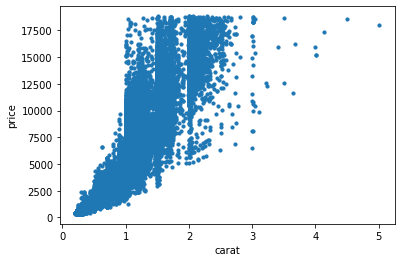

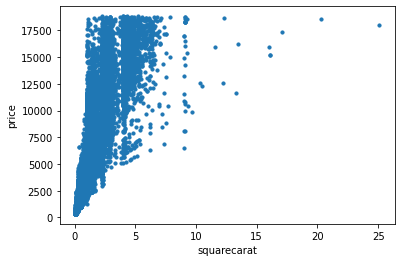

In [7]:
diamonds.plot.scatter("carat", "price", s = 10)

diamonds["squarecarat"] = diamonds["carat"]**2
diamonds.plot.scatter("squarecarat", "price", s = 10)

## Modeling the data

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler

#### Scalling and splitting

In [9]:
RS = RobustScaler()
X = diamonds.drop("price", axis = 1)
X = RS.fit_transform(X)
y = diamonds["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

#### Creating comparision table for models

In [10]:
models = pd.DataFrame(index = ["MSE_train", "MSE_test"], columns = ["NULL", "MLR", "KNN", "LASSO"])
models

,NULL,MLR,KNN,LASSO
MSE_train,NaN,NaN,NaN,NaN
MSE_test,NaN,NaN,NaN,NaN


### Models

#### A. NULL Model

In [11]:
y_pred_null_value = diamonds["price"].mean()
y_pred_null_list1 = [y_pred_null_value]*y_train.size
y_pred_null_list2 = [y_pred_null_value]*y_test.size
models.loc["MSE_train", "NULL"] = mean_squared_error(y_pred = y_pred_null_list1, y_true = y_train)
models.loc["MSE_test", "NULL"] = mean_squared_error(y_pred = y_pred_null_list2, y_true = y_test)

#### B. Multiple Linear Regression Model

In [12]:
from sklearn.linear_model import LinearRegression
MLR = LinearRegression()
MLR.fit(X_train, y_train)
models.loc["MSE_train","MLR"] = mean_squared_error(y_pred = MLR.predict(X_train), y_true = y_train)
models.loc["MSE_test","MLR"] = mean_squared_error(y_pred = MLR.predict(X_test), y_true = y_test)

#### C. K-Nearest Neighbors Model

In [13]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors = 10, weights = "distance", metric = "euclidean", n_jobs = -1)
KNN.fit(X_train, y_train)
models.loc["MSE_train","KNN"] = mean_squared_error(y_pred = KNN.predict(X_train), y_true = y_train)
models.loc["MSE_test","KNN"] = mean_squared_error(y_pred = KNN.predict(X_test), y_true = y_test)

#### D. LASSO Model

In [14]:
from sklearn.linear_model import Lasso
LASSO = Lasso(alpha = 0.1)
LASSO.fit(X_train, y_train)
models.loc["MSE_train","LASSO"] = mean_squared_error(y_pred = LASSO.predict(X_train), y_true = y_train)
models.loc["MSE_test","LASSO"] = mean_squared_error(y_pred = LASSO.predict(X_test), y_true = y_test)

C:\Users\tohid\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 782305135.1680298, tolerance: 68714800.45190111
  model = cd_fast.enet_coordinate_descent(


In [15]:
models

,NULL,MLR,KNN,LASSO
MSE_train,15923909.173534,1250840.996968,59.967155,1250899.646873
MSE_test,15881035.11875,1248901.790126,583111.097947,1249406.207444


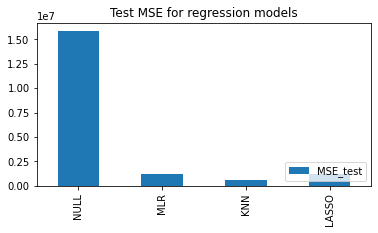

In [16]:
fig, ax = plt.subplots(figsize = (6,3))
models.loc["MSE_test"].plot(kind = "bar", ax = ax)
ax.set_title("Test MSE for regression models")
ax.legend(loc = 'lower right')

#### Insight:
- It is observable that the null model is much worse than the 3 others
- By removing the null model from the plot, we can make comparision with a better resolution

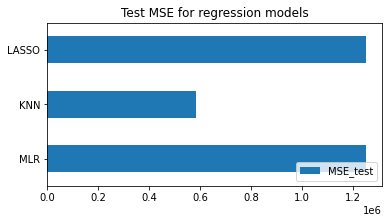

In [17]:
models1 = models.drop(["NULL"], axis = 1)
fig, ax = plt.subplots(figsize = (6,3))
models1.loc["MSE_test"].plot(kind = "barh", ax = ax)
ax.set_title("Test MSE for regression models")
ax.legend(loc = 'lower right')

### Insight:
As can be seen, the best model is KNN.

Text(0, 0.5, 'price_test')

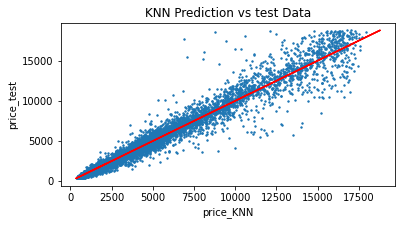

In [18]:
fig, ax = plt.subplots(figsize = (6, 3))
plt.scatter(x = KNN.predict(X_test), y = y_test , s = 2)
plt.plot(y_test, y_test, color = "red")
ax.set_title("KNN Prediction vs test Data")
ax.set_xlabel("price_KNN")
ax.set_ylabel("price_test")

## Predciting the price of a new diamond using the best model
As we are happy with the model, we are going to retrain the model with all the data and use the final model for prediction purposes.

In [19]:
KNN_final = KNN.fit(X, y)

In [20]:
new_diamond = OrderedDict([('carat', 0.024), ('depth', 62.3), ('table', 59.0), ('x', 3.95),
                          ('y', 3.92), ('z', 2.45), ('cut_Good', 0.0), ('cut_Ideal', 0.0),
                          ('cut_Premium', 1.0), ('cut_Very Good', 0.0), ('color_E', 0.0), 
                          ('color_F', 0.0), ('color_G', 1.0), ('color_H', 0.0), 
                          ('color_I', 0.0), ('color_J', 0.0), ('clarity_IF', 0.0), 
                          ('clarity_SI1', 0.0), ('clarity_SI2', 0.0), ('clarity_VS1', 0.0),
                          ('clarity_VS2', 0.0), ('clarity_VVS1', 1.0), ('clarity_VVS2', 0.0),
                          ('caratsquared', 0.0576)
                          ])

In [21]:
new_diamond = pd.Series(new_diamond).values.reshape(1, -1)
new_diamond = RS.transform(new_diamond)
new_diamond

array([[-1.05625   ,  0.33333333,  0.66666667, -0.95628415, -0.98351648,
        -0.95575221,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        , -0.46918403]])

In [22]:
KNN_final.predict(new_diamond)

array([869.13097074])